In [260]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [261]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Distribution plots for Density feature is shown


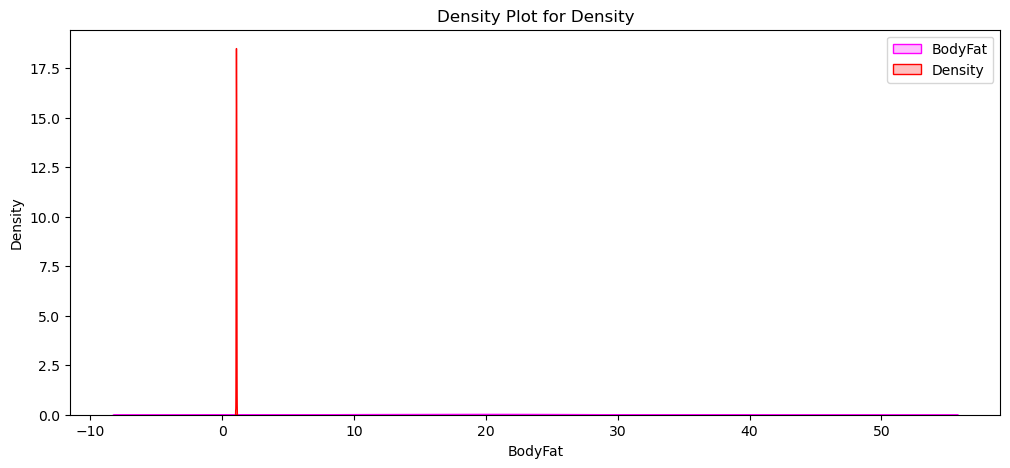

----------------------------------------------------------------------------------------------------
Distribution plots for BodyFat feature is shown


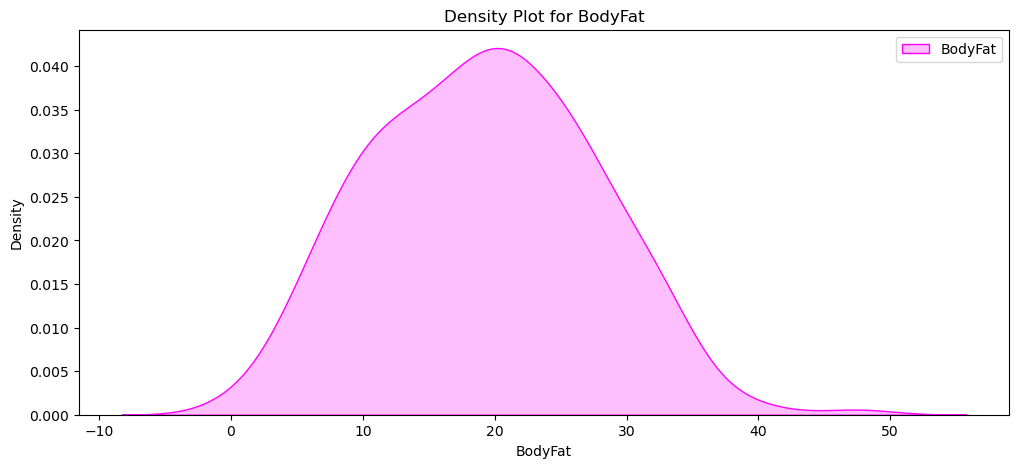

----------------------------------------------------------------------------------------------------
Distribution plots for Age feature is shown


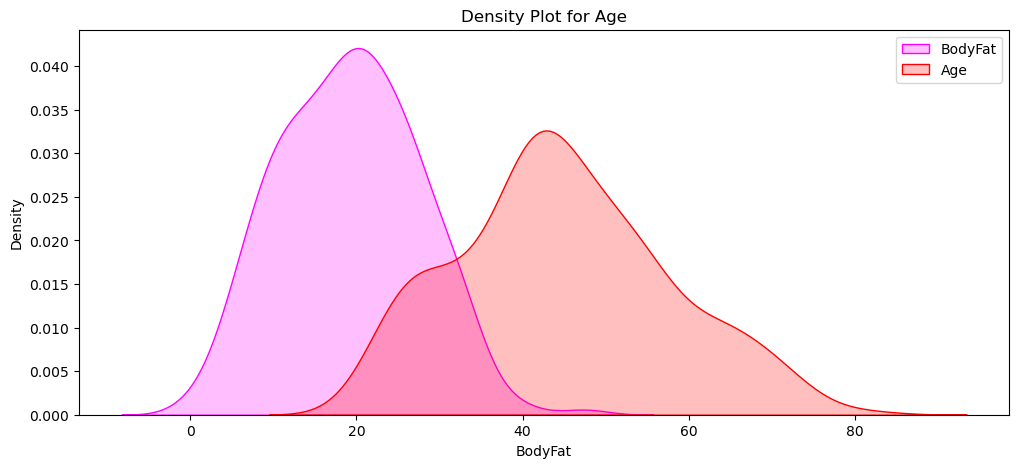

----------------------------------------------------------------------------------------------------
Distribution plots for Weight feature is shown


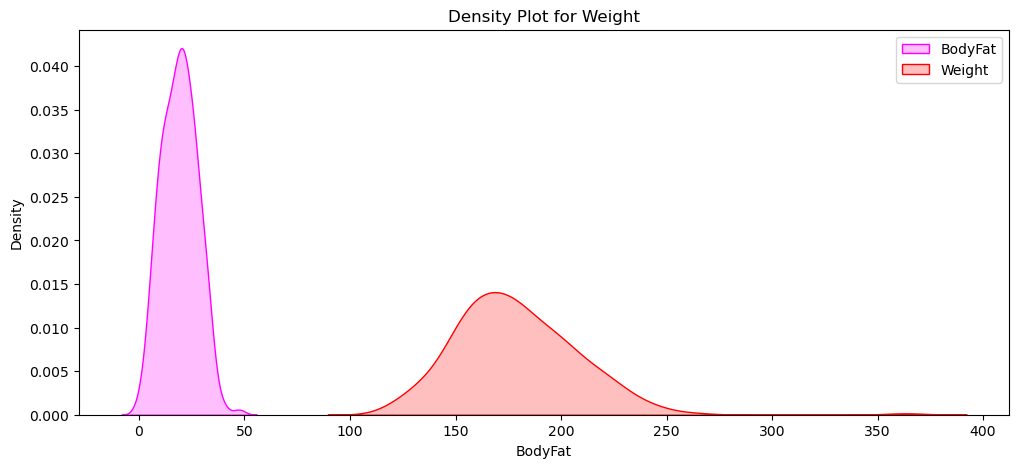

----------------------------------------------------------------------------------------------------
Distribution plots for Height feature is shown


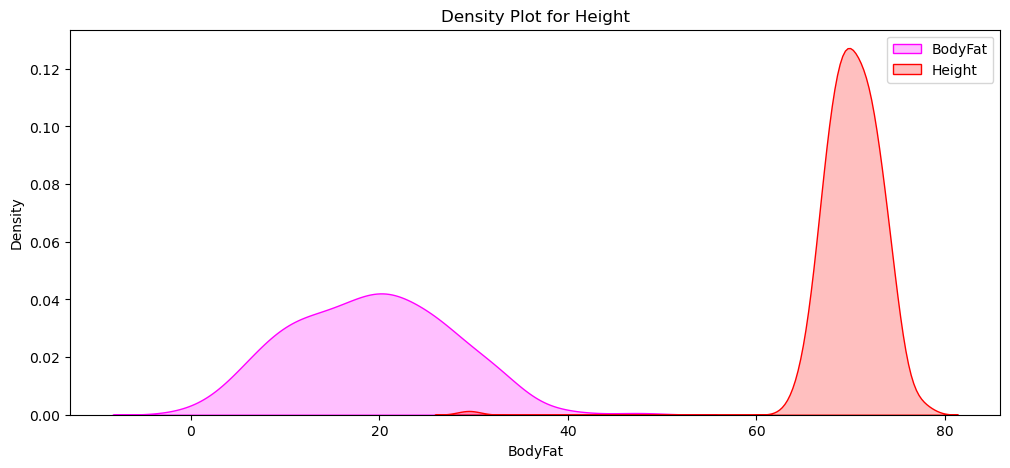

----------------------------------------------------------------------------------------------------
Distribution plots for Neck feature is shown


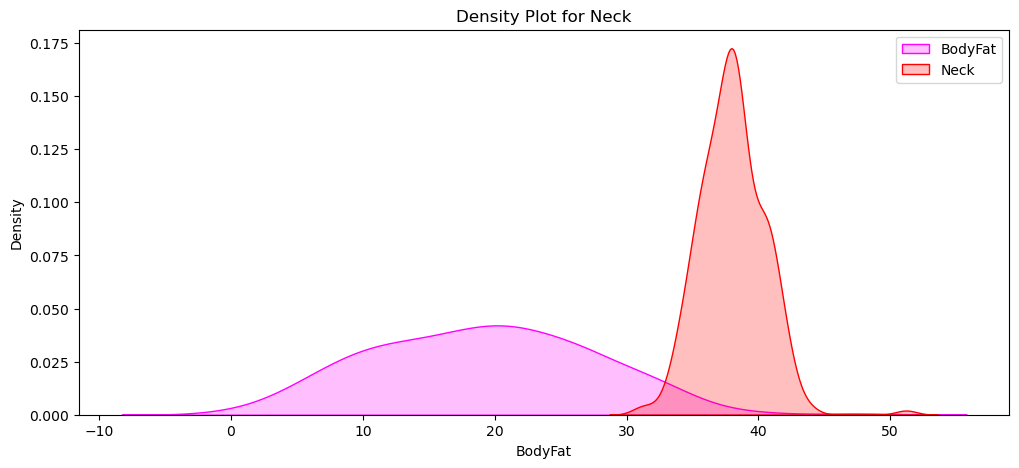

----------------------------------------------------------------------------------------------------
Distribution plots for Chest feature is shown


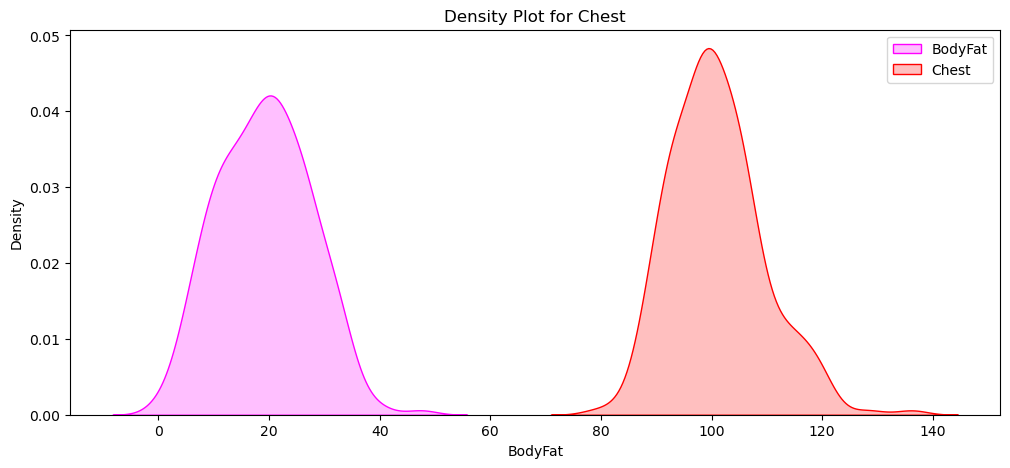

----------------------------------------------------------------------------------------------------
Distribution plots for Abdomen feature is shown


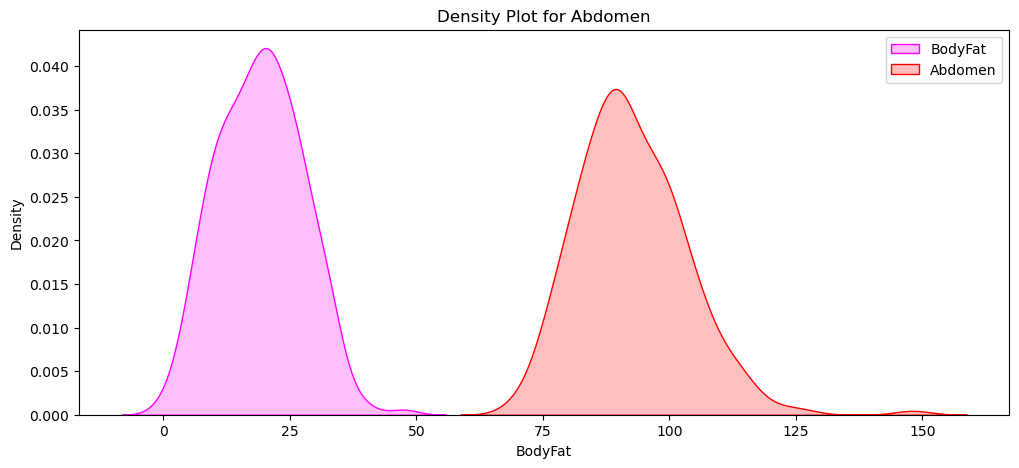

----------------------------------------------------------------------------------------------------
Distribution plots for Hip feature is shown


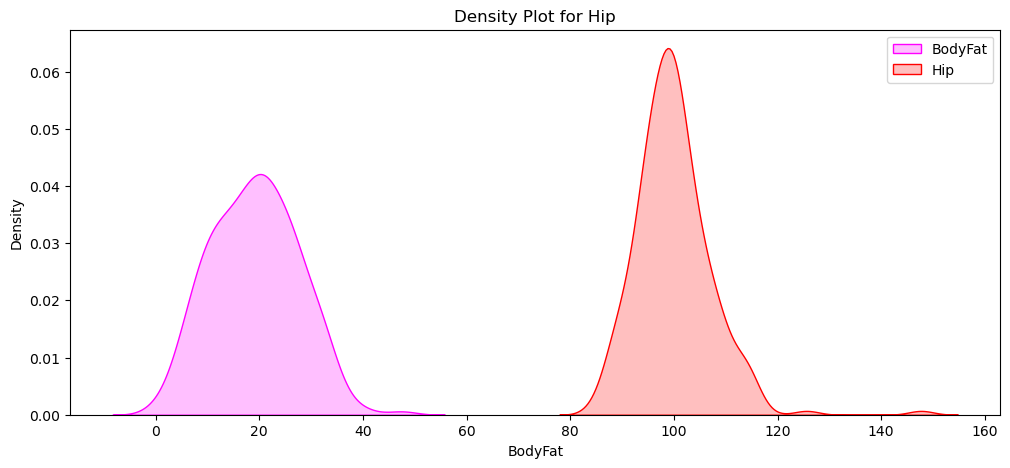

----------------------------------------------------------------------------------------------------
Distribution plots for Thigh feature is shown


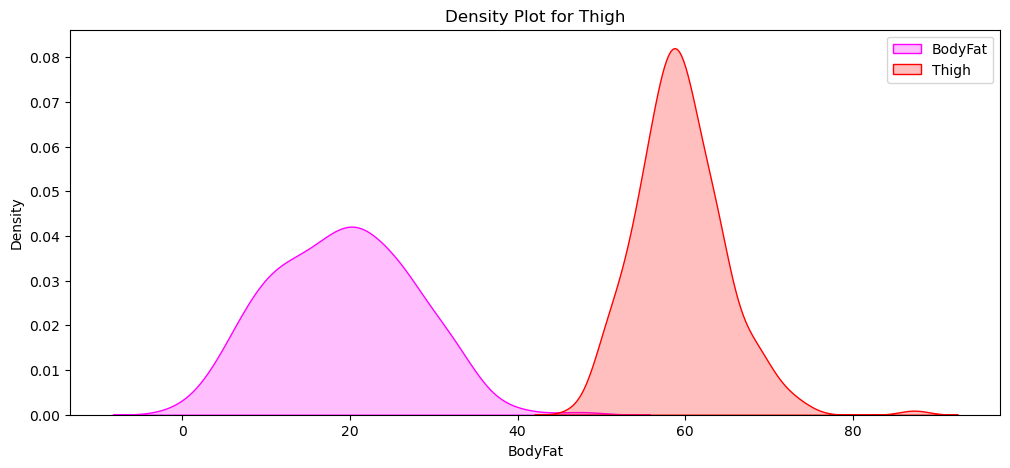

----------------------------------------------------------------------------------------------------
Distribution plots for Knee feature is shown


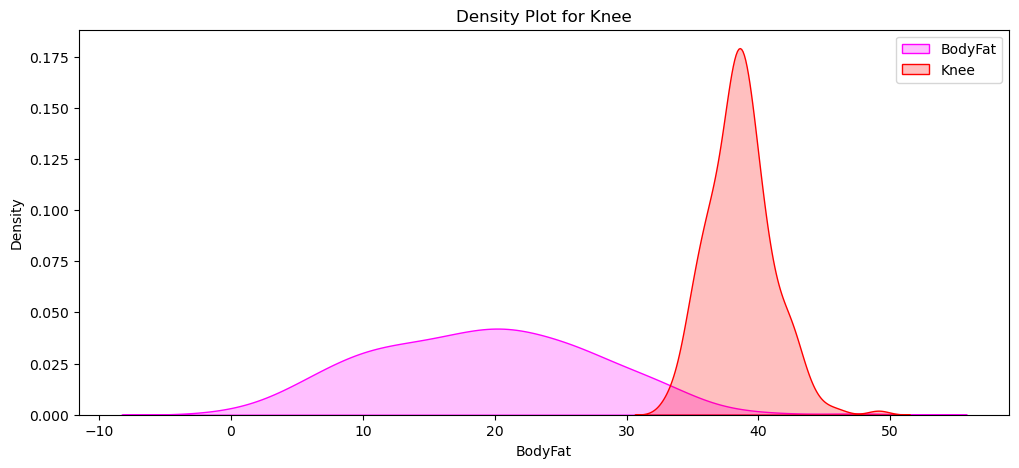

----------------------------------------------------------------------------------------------------
Distribution plots for Ankle feature is shown


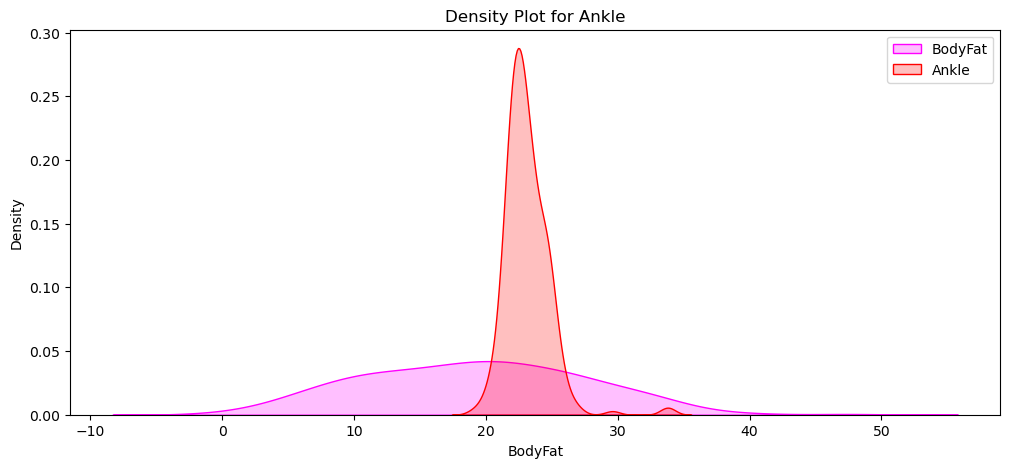

----------------------------------------------------------------------------------------------------
Distribution plots for Biceps feature is shown


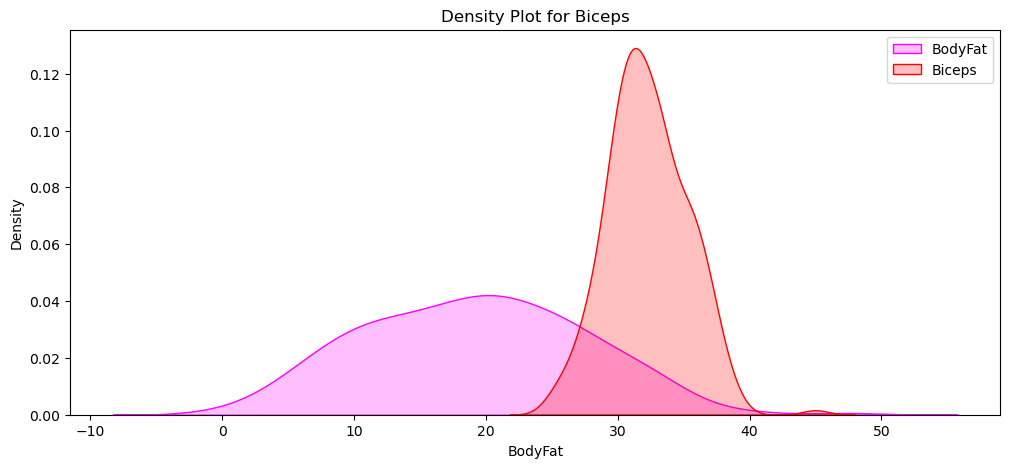

----------------------------------------------------------------------------------------------------
Distribution plots for Forearm feature is shown


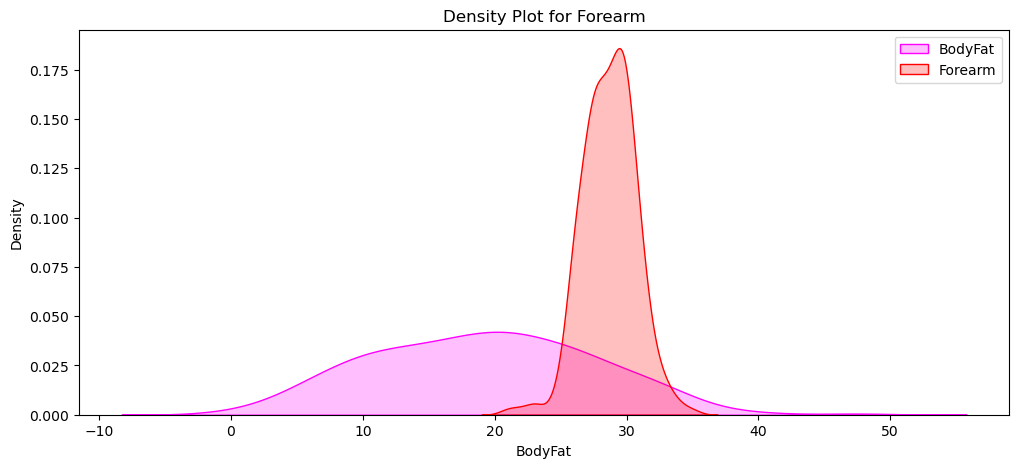

----------------------------------------------------------------------------------------------------
Distribution plots for Wrist feature is shown


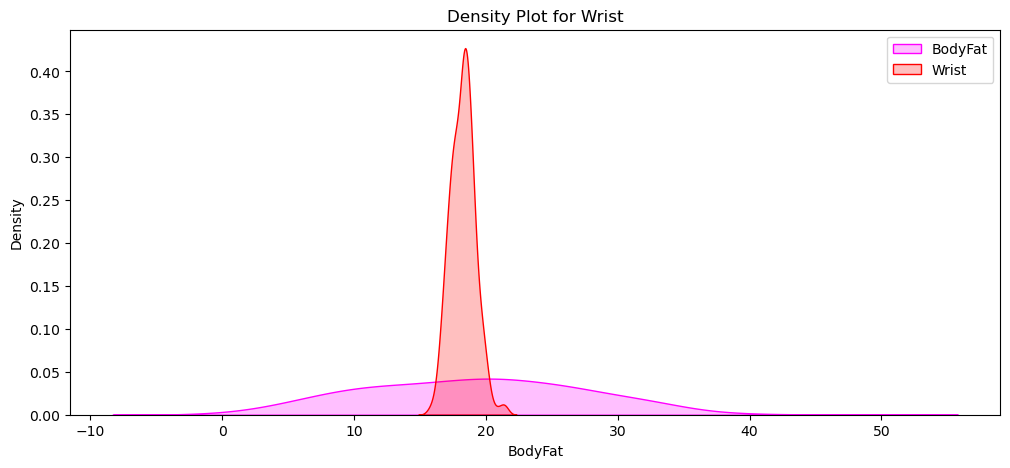

----------------------------------------------------------------------------------------------------


In [263]:
try:
    df = pd.read_csv("bodyfat.csv")  
except FileNotFoundError:
    print("Error: CSV file not found. Check the file path.")
    exit()

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)

def plotdistplots(col):
    plt.figure(figsize=(12, 5))
    
    sns.kdeplot(df['BodyFat'], color='magenta', label='BodyFat', fill=True)
    
    if col != 'BodyFat':
        sns.kdeplot(df[col], color='red', label=col, fill=True)
    
    plt.legend()
    plt.title(f'Density Plot for {col}')
    plt.show()

cols = df.columns
for col in cols:
    print(f'Distribution plots for {col} feature is shown')
    plotdistplots(col)
    print("-" * 100)


In [264]:
import scipy.stats as stats


Distribution plots for the feature Density feature is shown


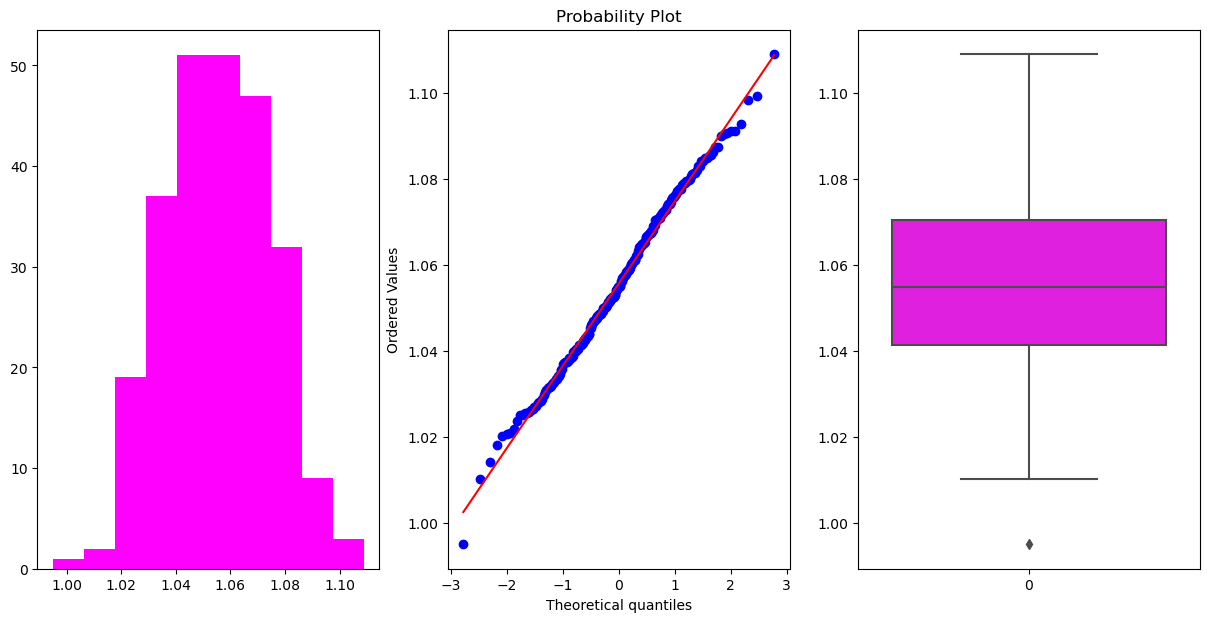

Distribution plots for the feature BodyFat feature is shown


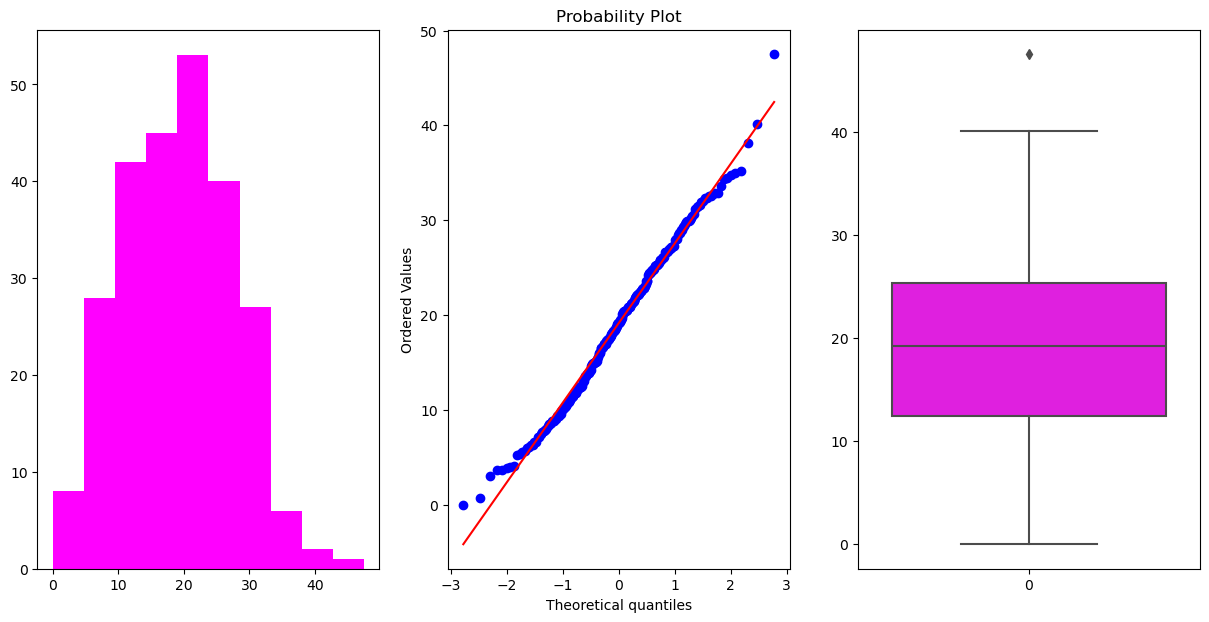

Distribution plots for the feature Age feature is shown


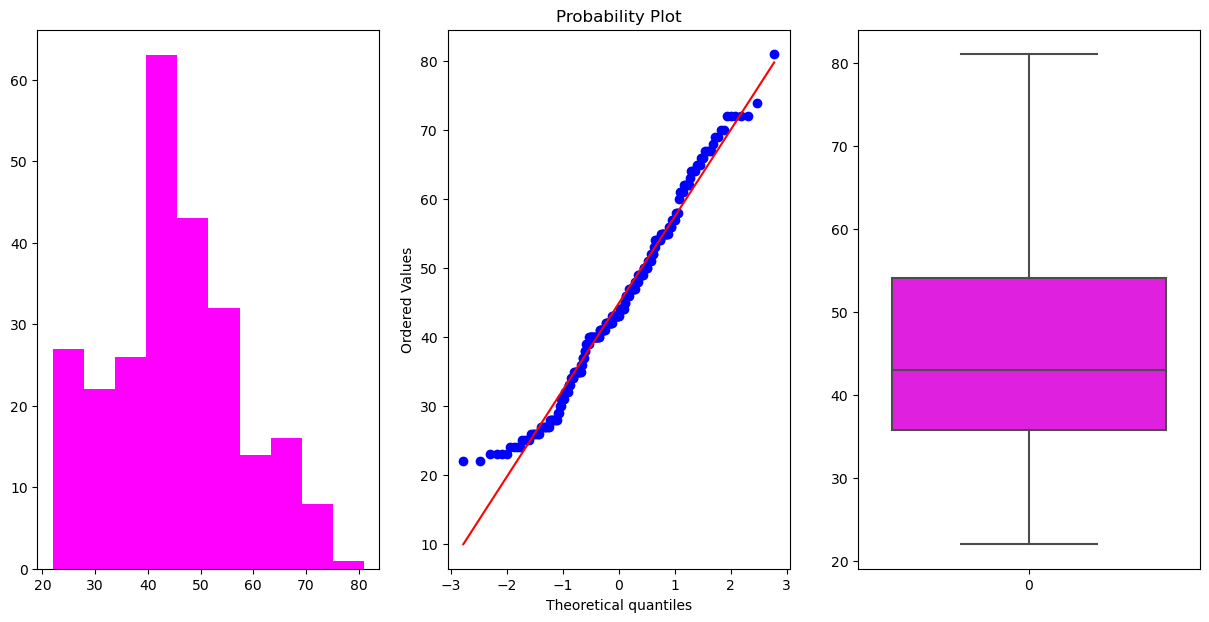

Distribution plots for the feature Weight feature is shown


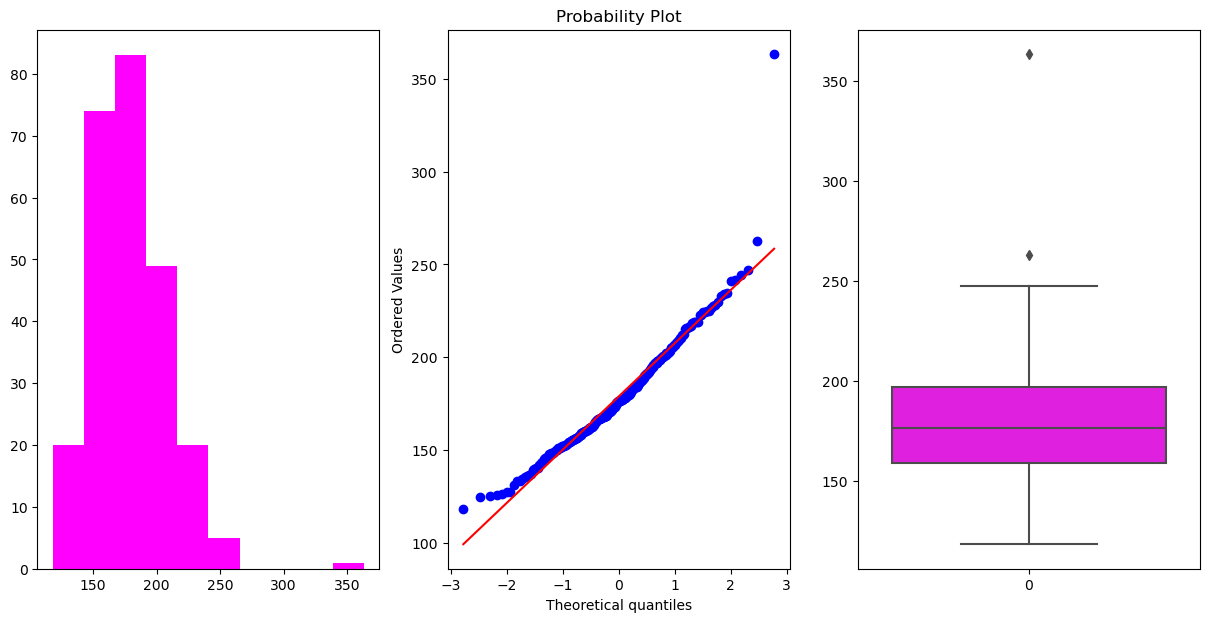

Distribution plots for the feature Height feature is shown


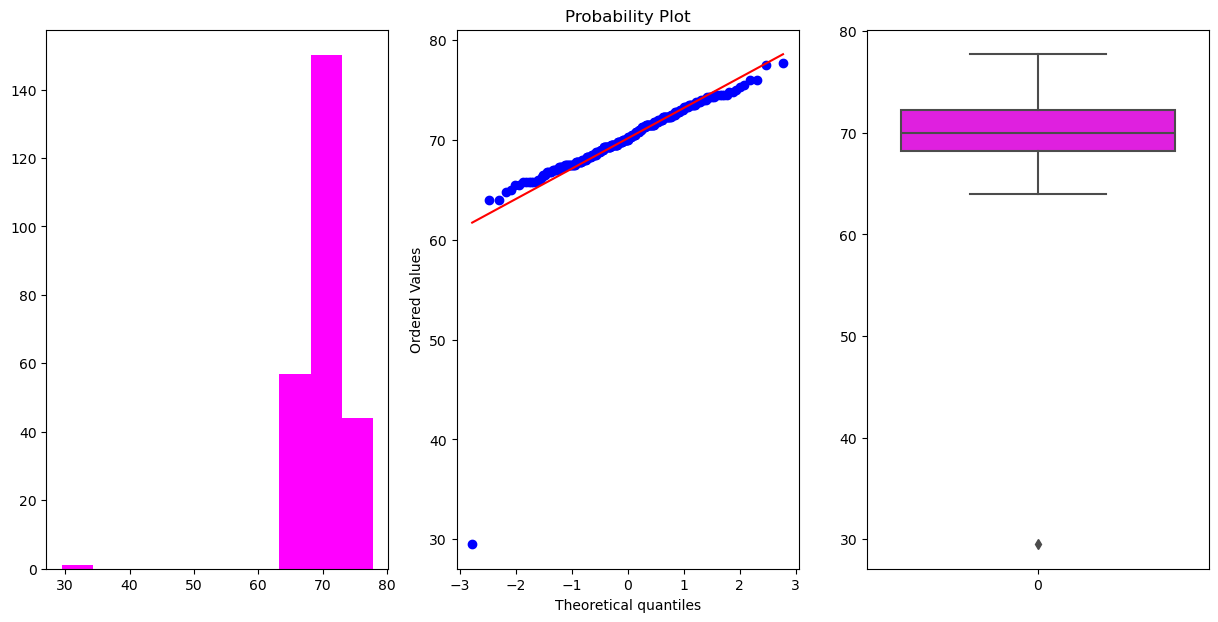

Distribution plots for the feature Neck feature is shown


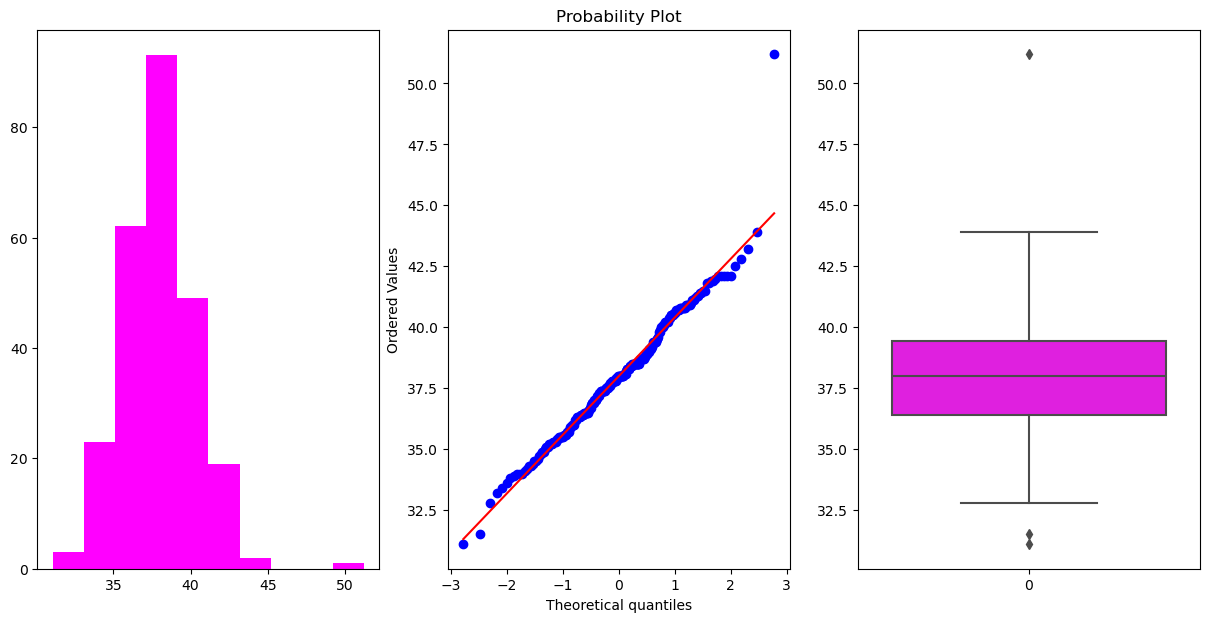

Distribution plots for the feature Chest feature is shown


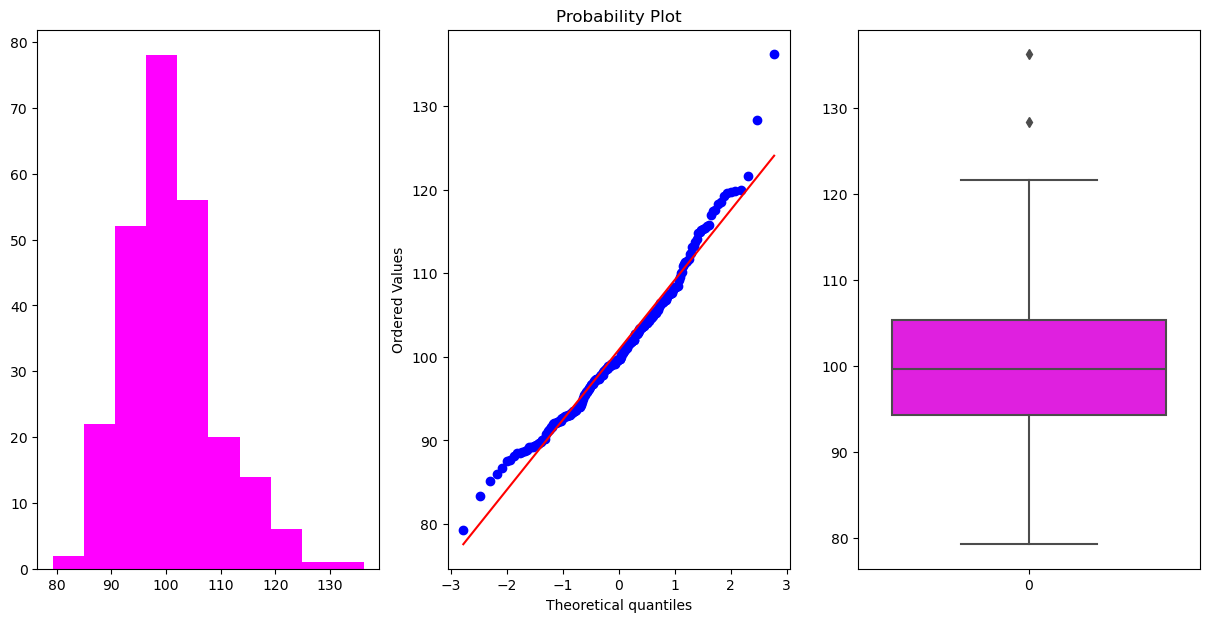

Distribution plots for the feature Abdomen feature is shown


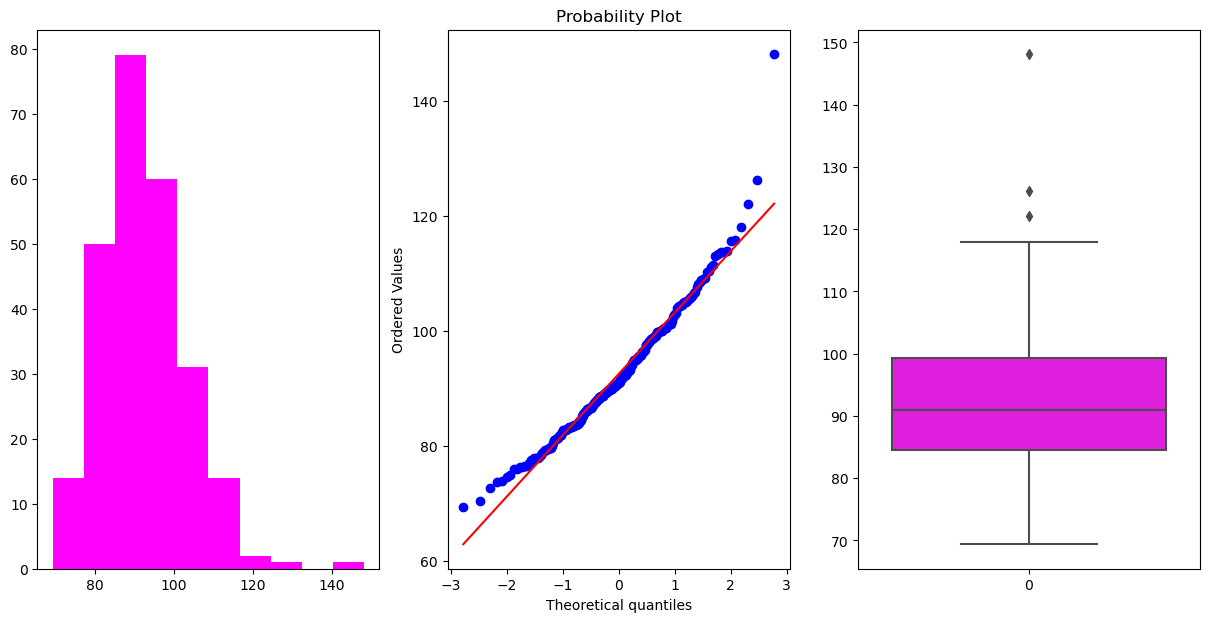

Distribution plots for the feature Hip feature is shown


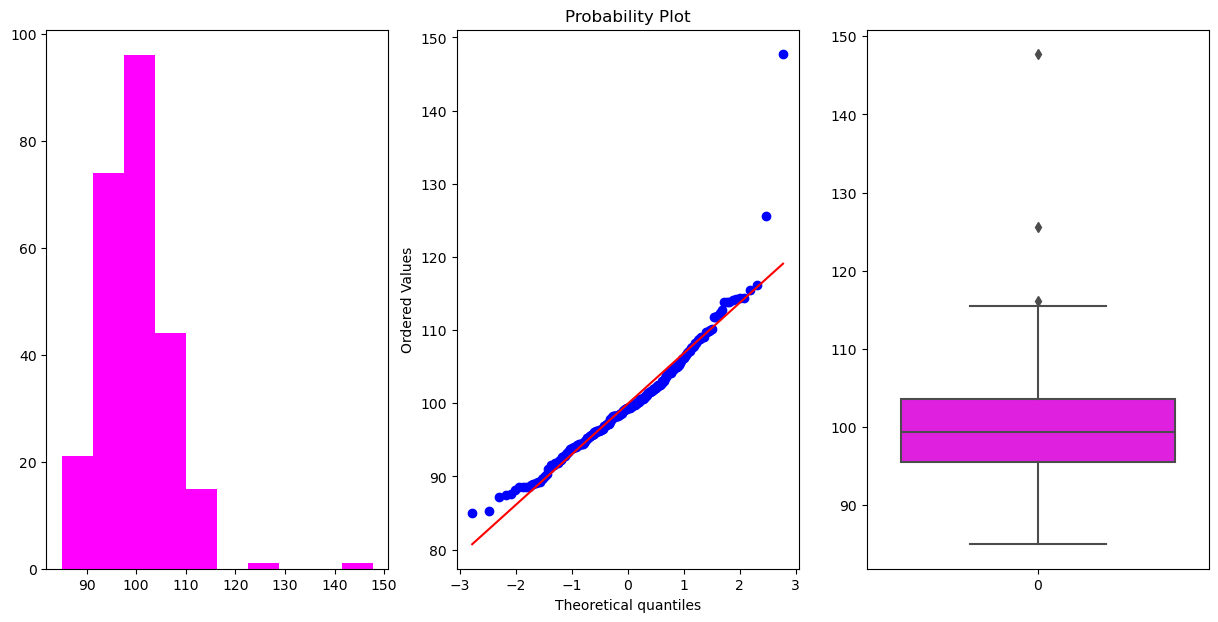

Distribution plots for the feature Thigh feature is shown


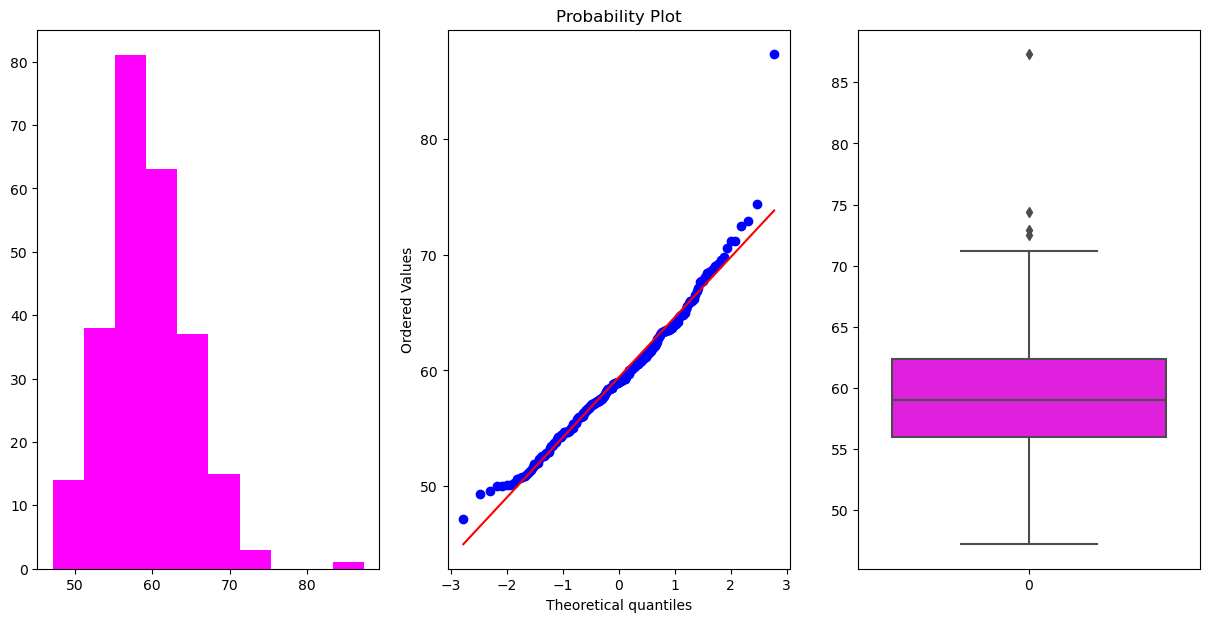

Distribution plots for the feature Knee feature is shown


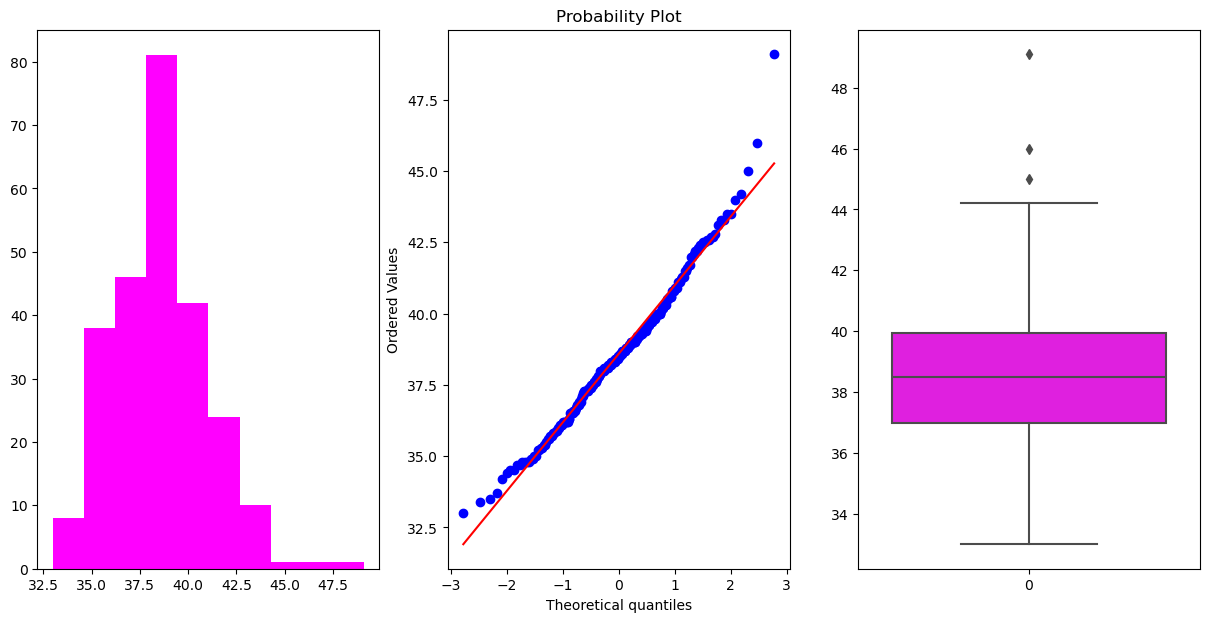

Distribution plots for the feature Ankle feature is shown


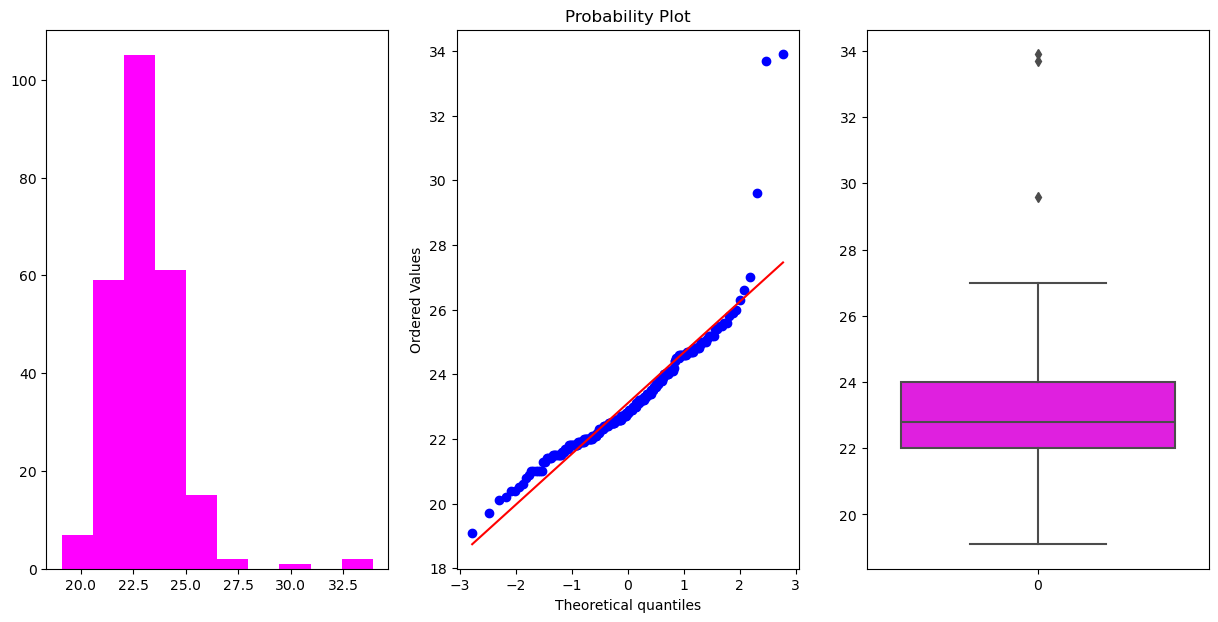

Distribution plots for the feature Biceps feature is shown


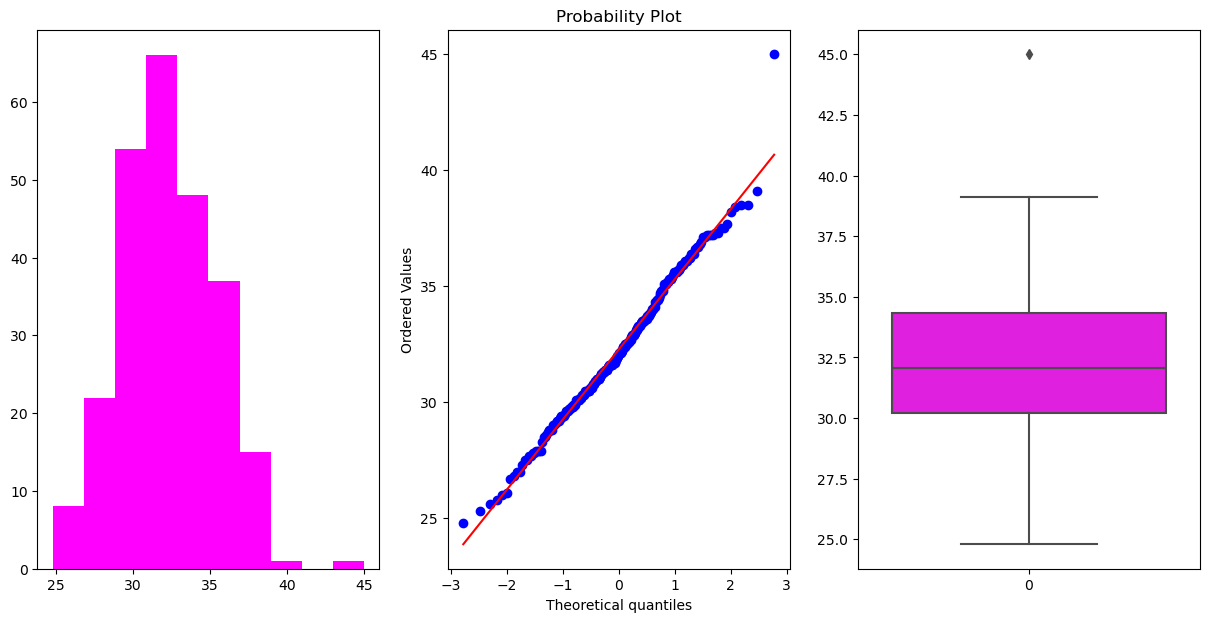

Distribution plots for the feature Forearm feature is shown


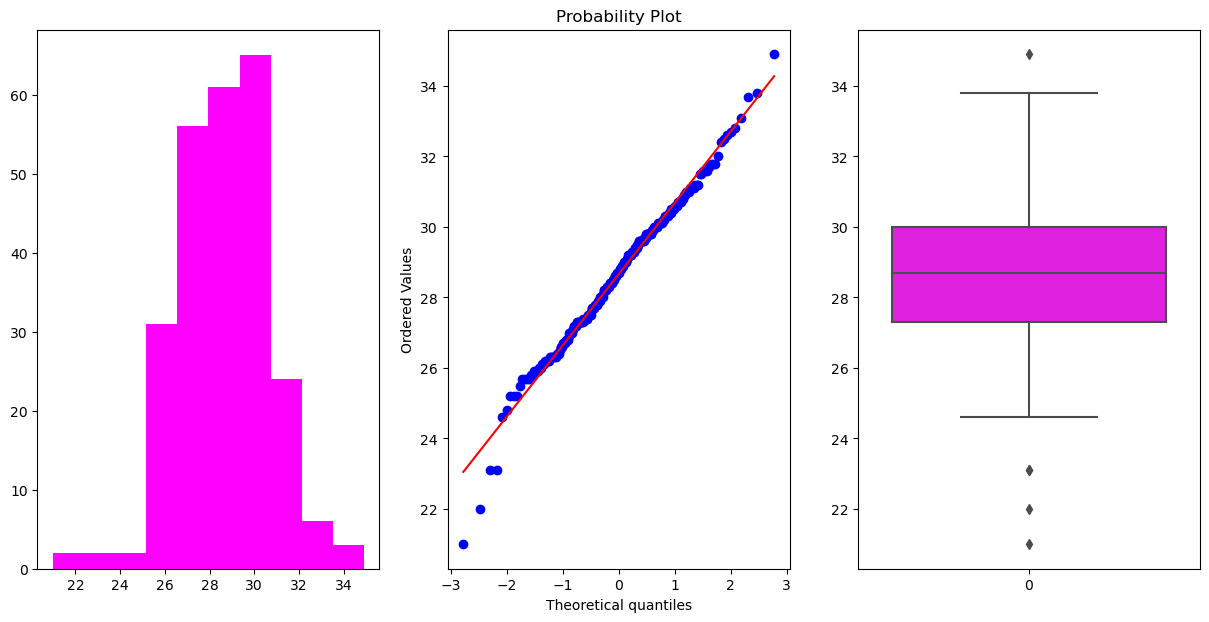

Distribution plots for the feature Wrist feature is shown


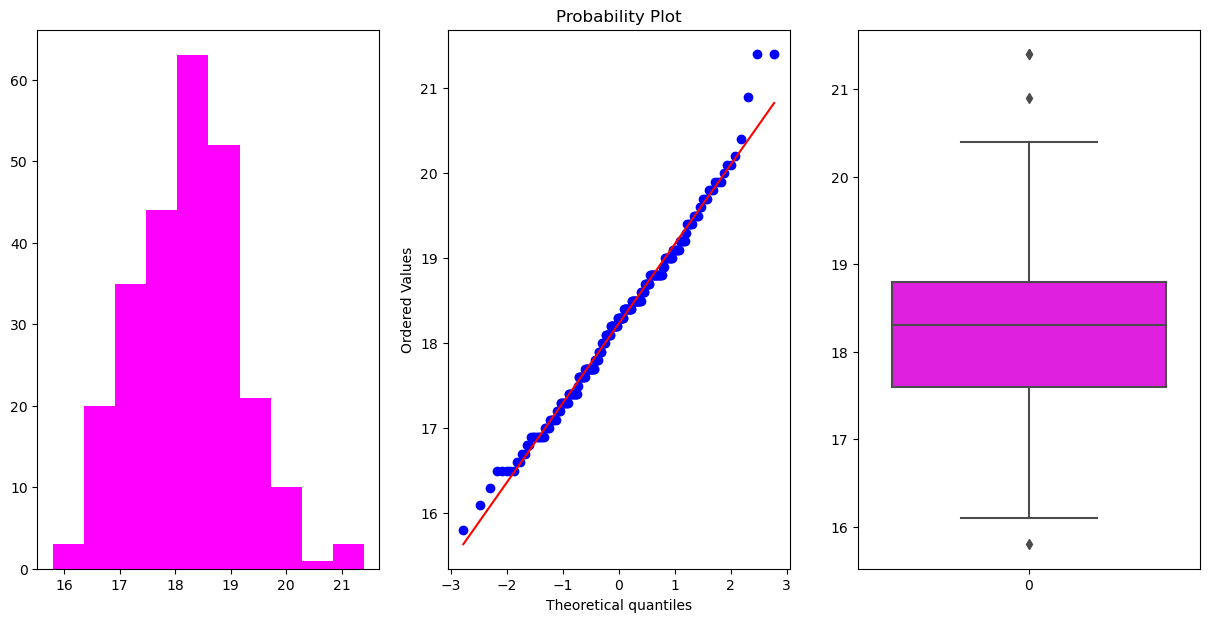

In [265]:
def drawplot(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='magenta')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sn.boxplot(df[col],color='magenta')
    
    plt.show()

cols = list(df.columns)
for i in range(len(cols)):
    print(f'Distribution plots for the feature {cols[i]} feature is shown')
    drawplot(df,cols[i])
    print("=" * 100)
    

# Checking for Outliers

In [266]:
upperlimit = []
lowerlimit = []
for i in df.columns:
    upperlimit.append(df[i].mean()+(df[i].std())*4)
    lowerlimit.append(df[i].mean()+(df[i].std())*4)


In [267]:
cols = list(df.columns)
j=0
for i in range(len(cols)):
     temp=df.loc[(df[cols[i]]>upperlimit[j])&(df[cols[i]]<lowerlimit[j])]
     j+=1
        

In [268]:
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


#Feature Selection 

In [269]:
data = df.copy()
test = data['BodyFat']
train = data.drop(['BodyFat'],axis=1)

In [270]:
from sklearn.ensemble import ExtraTreesRegressor
er = ExtraTreesRegressor()
er.fit(train,test)

ExtraTreesRegressor()

In [271]:
er.feature_importances_

array([0.7115348 , 0.00175837, 0.01126641, 0.00300865, 0.00646493,
       0.04347597, 0.18302633, 0.0199167 , 0.00551963, 0.0045293 ,
       0.00103797, 0.00555922, 0.00081356, 0.00208817])

<Axes: >

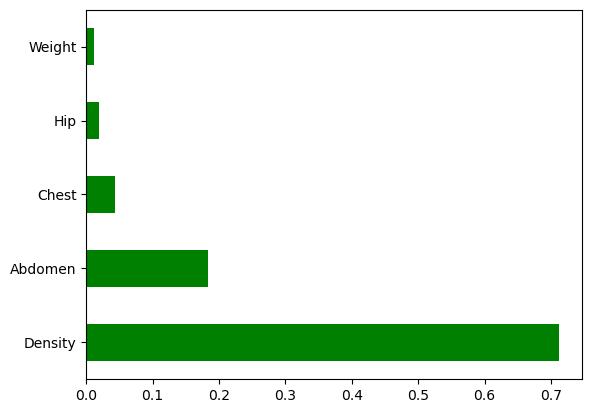

In [272]:
series = pd.Series(er.feature_importances_, index=train.columns)
series.nlargest(5).plot(kind = 'barh', color='green') #bar graph of largest 5 features

# using mutual information gain for feature selection

In [273]:
from sklearn.feature_selection import mutual_info_regression
mr = mutual_info_regression(train,test)

<Axes: >

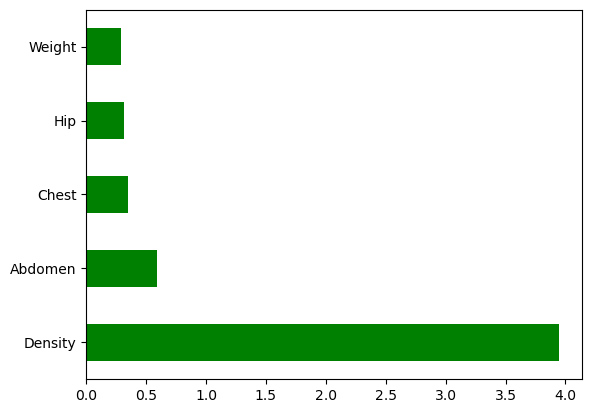

In [274]:
plotdata = pd.Series(mr, index = train.columns)
plotdata.nlargest(5).plot(kind='barh',color='green')

# Removing Correlation

In [275]:
data


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


<Axes: >

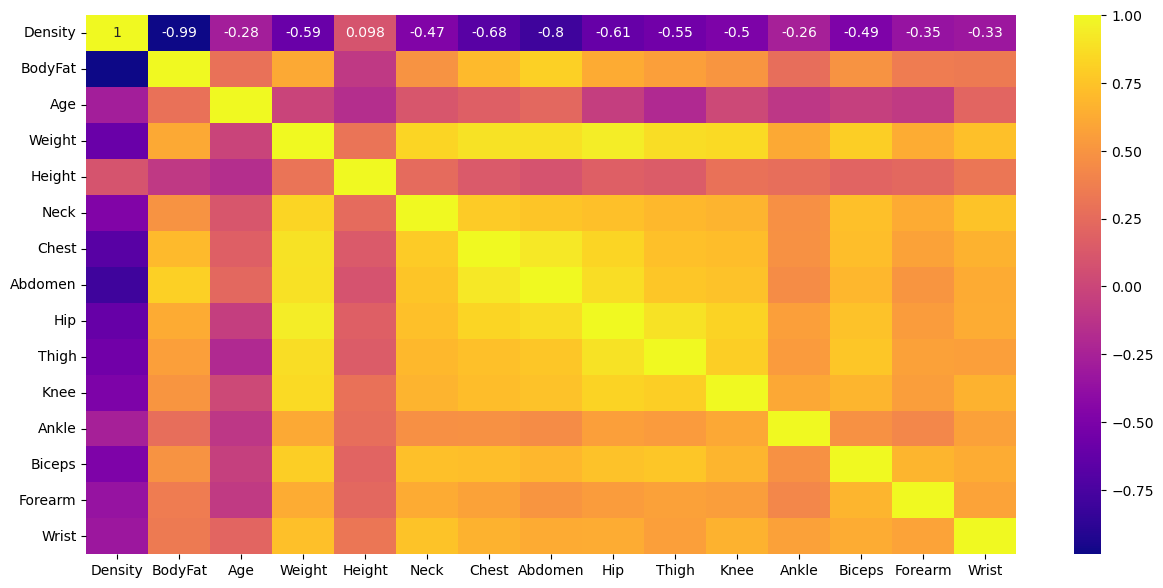

In [276]:
plt.figure(figsize = (15,7))
sn.heatmap(df.corr(),annot = True, cmap = 'plasma')

In [277]:
df.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


In [278]:
def correlation(df, threshold):
    colcor = set()
    cormat = df.corr()
    for i in range(len(cormat)):
        for j in range(i):
            if abs(cormat.iat[i, j]) > threshold:  # Using .iat[] for direct positional access
                colname = cormat.columns[i]
                colcor.add(colname)
    return colcor

ans = correlation(train, threshold=0.85)
ans


{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

In [279]:
temp = data[list(data.columns)]
temp.shape

(252, 15)

In [280]:
temp.values

array([[ 1.0708, 12.3   , 23.    , ..., 32.    , 27.4   , 17.1   ],
       [ 1.0853,  6.1   , 22.    , ..., 30.5   , 28.9   , 18.2   ],
       [ 1.0414, 25.3   , 22.    , ..., 28.8   , 25.2   , 16.6   ],
       ...,
       [ 1.0328, 29.3   , 72.    , ..., 31.3   , 27.2   , 18.    ],
       [ 1.0399, 26.    , 72.    , ..., 30.5   , 29.4   , 19.8   ],
       [ 1.0271, 31.9   , 74.    , ..., 33.7   , 30.    , 20.9   ]])

In [281]:
temp.shape[1]

15

In [282]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure 'temp' contains only numerical columns (VIF only works on numeric data)
temp = data.select_dtypes(include=['number'])

# Initialize DataFrame
info = pd.DataFrame()
info['Column'] = temp.columns  # Assign column names first
info['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]  # Correct indexing

print(info)


     Column          VIF
0   Density  3695.622377
1   BodyFat    33.845429
2       Age    31.376101
3    Weight  1238.097164
4    Height   613.410514
5      Neck  1081.965633
6     Chest  1374.457425
7   Abdomen  1332.624257
8       Hip  2933.636131
9     Thigh  1017.257501
10     Knee  1187.890413
11    Ankle   356.293529
12   Biceps   419.391664
13  Forearm   454.571766
14    Wrist  1349.973920


In [283]:
cols1 = list(series.nlargest(5).index)
cols2 = list(plotdata.nlargest(5).index)

cols1,cols2

(['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'])

In [284]:
totrain = train[cols1]
totrain.head()

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25


In [285]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [286]:
selected_features = list(totrain[cols1])
X = df[selected_features]
y = df['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(totrain,test,test_size=0.2)
X_train.shape,X_test.shape

((201, 5), (51, 5))

[Text(0.4816761363636364, 0.9583333333333334, 'x[0] <= 1.054\nsquared_error = 68.872\nsamples = 201\nvalue = 19.176'),
 Text(0.2, 0.875, 'x[0] <= 1.036\nsquared_error = 21.77\nsamples = 97\nvalue = 26.315'),
 Text(0.07670454545454546, 0.7916666666666666, 'x[0] <= 1.027\nsquared_error = 7.636\nsamples = 35\nvalue = 31.557'),
 Text(0.023863636363636365, 0.7083333333333334, 'x[0] <= 1.016\nsquared_error = 5.06\nsamples = 13\nvalue = 34.377'),
 Text(0.00909090909090909, 0.625, 'x[0] <= 1.012\nsquared_error = 1.0\nsamples = 2\nvalue = 39.1'),
 Text(0.004545454545454545, 0.5416666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 40.1'),
 Text(0.013636363636363636, 0.5416666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 38.1'),
 Text(0.038636363636363635, 0.625, 'x[1] <= 115.75\nsquared_error = 1.005\nsamples = 11\nvalue = 33.518'),
 Text(0.022727272727272728, 0.5416666666666666, 'x[0] <= 1.024\nsquared_error = 0.141\nsamples = 7\nvalue = 32.814'),
 Text(0.01818181818181818, 0.4583

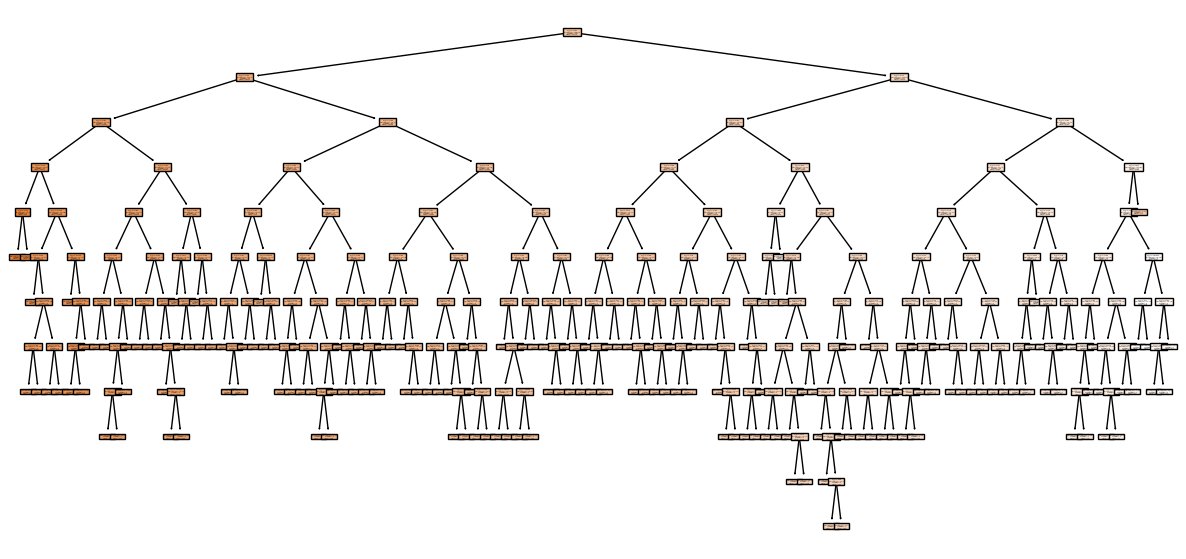

In [287]:
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(reg,filled=True)

In [288]:
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = path.ccp_alphas

In [289]:
ccp_alpha

array([0.00000000e+00, 4.24204618e-16, 5.65606158e-16, 5.65606158e-16,
       8.48409237e-16, 8.48409237e-16, 1.13121232e-15, 1.13121232e-15,
       2.26242463e-15, 2.82803079e-15, 6.78727389e-15, 1.86567164e-05,
       2.48756219e-05, 2.48756219e-05, 2.48756219e-05, 2.48756219e-05,
       2.48756219e-05, 2.48756219e-05, 2.48756219e-05, 2.48756219e-05,
       2.48756219e-05, 2.48756219e-05, 2.48756219e-05, 2.48756219e-05,
       2.48756219e-05, 2.48756219e-05, 2.48756219e-05, 2.48756219e-05,
       2.48756219e-05, 2.48756219e-05, 2.48756219e-05, 2.48756219e-05,
       2.48756219e-05, 3.31674959e-05, 3.31674959e-05, 3.31674959e-05,
       3.31674959e-05, 3.31674959e-05, 3.31674959e-05, 3.31674959e-05,
       3.31674959e-05, 3.31674959e-05, 3.31674959e-05, 3.31674959e-05,
       3.73134328e-05, 3.73134328e-05, 4.97512438e-05, 4.97512438e-05,
       6.21890547e-05, 6.63349917e-05, 6.63349917e-05, 7.46268657e-05,
       7.46268657e-05, 7.46268657e-05, 7.46268657e-05, 7.46268657e-05,
      

In [290]:
len(ccp_alpha)

161

In [291]:
alphalist=[]
for i in range(len(ccp_alpha)):
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha[i])
    reg.fit(X_train,y_train)
    alphalist.append(reg)

In [292]:
alphalist[1:5]

[DecisionTreeRegressor(ccp_alpha=4.242046183642389e-16),
 DecisionTreeRegressor(ccp_alpha=5.656061578189852e-16),
 DecisionTreeRegressor(ccp_alpha=5.656061578189852e-16),
 DecisionTreeRegressor(ccp_alpha=8.484092367284778e-16)]

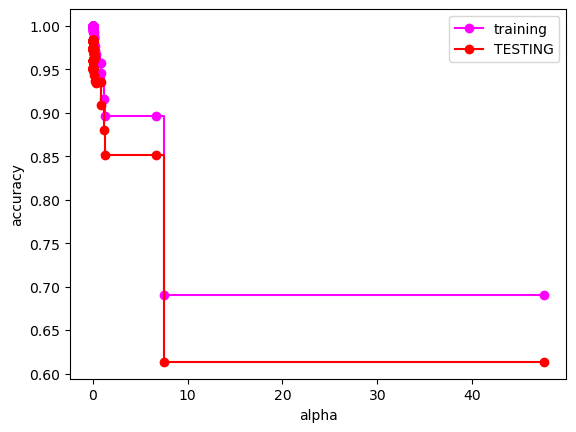

In [293]:
trainscore = [alphalist[i].score(X_train,y_train) for i in range(len(alphalist))]

testscore = [alphalist[i].score(X_test,y_test) for i in range(len(alphalist))]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,trainscore,marker='o',label='training',color='magenta',drawstyle='steps-post')
plt.plot(ccp_alpha,testscore,marker='o',label='TESTING',color='red',drawstyle='steps-post')
plt.legend()
plt.show()

In [294]:
#normal approach

clf = DecisionTreeRegressor(ccp_alpha=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f'Decision Tree Normal Approach:{metrics.r2_score(y_test,y_pred)}')

rf = RandomForestRegressor(ccp_alpha=1,n_estimators=1000)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f'Random Forest Normal Approach:{metrics.r2_score(y_test,y_pred_rf)}')

Decision Tree Normal Approach:0.8912577282922622
Random Forest Normal Approach:0.9308854906570578


In [295]:
params = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [int(x) for x in np.linspace(100, 600, 10)],
            'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],  
            'max_depth': [10, 15, 20, 25],
            'min_samples_split': [2, 5, 10,12],
            'min_samples_leaf': [2, 5, 10, 12],
            'max_features': [1.0, 'sqrt'],  # Avoid 'auto'
            'ccp_alpha': [1, 2, 2.5,3, 3.5,4, 5],
        }
    },
    'D-tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'absolute_error', 'friedman_mse'], 
            'splitter': ['best', 'random'],
            'min_samples_split': [1,2, 5, 10,12],
            'min_samples_leaf': [1, 2, 5, 10,12],
            'max_features': [1.0, 'sqrt'],
            'ccp_alpha':  [1, 2, 2.5,3, 3.5,4, 5],
        }
    },
    'SVM': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'tol': [1e-10, 1e-5, 1e-4, 0.025,0.50,0.75],
            'C': [0.25, 0.5, 0.75, 1.0],
            'max_iter': [int(x) for x in np.linspace(100, 250, 5)],
        }
    },
}

In [296]:
scores = []

for modelname, param_dict in params.items():
    print(f"🔍 Tuning {modelname}...")

    model = param_dict['model']
    model_params = param_dict['params']  # ✅ Correct param dictionary

    try:
        X_fit = X_train
        if modelname == 'SVM':
            scaler = StandardScaler()
            X_fit = scaler.fit_transform(X_train)

        clf = RandomizedSearchCV(
            model,
            param_distributions=model_params,  # ✅ Fixed typo here
            cv=5,
            n_iter=10,
            n_jobs=-1,
            scoring='neg_mean_squared_error'
        )
        clf.fit(X_fit, y_train)

        print(f"\n✅ Model: {modelname}")
        print(f"Best Score (MSE): {clf.best_score_}")
        print(f"Best Estimator:\n {clf.best_estimator_}")

        scores.append({
            'model-name': modelname,
            'best-score': clf.best_score_,
            'best-estimator': clf.best_estimator_
        })

    except Exception as e:
        print(f"❌ {modelname} failed during tuning: {e}")




🔍 Tuning RandomForest...

✅ Model: RandomForest
Best Score (MSE): -3.195589850210245
Best Estimator:
 RandomForestRegressor(ccp_alpha=1, max_depth=15, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=488)
🔍 Tuning D-tree...

✅ Model: D-tree
Best Score (MSE): -5.473049089916861
Best Estimator:
 DecisionTreeRegressor(ccp_alpha=1, criterion='friedman_mse', max_features=1.0,
                      min_samples_leaf=5, min_samples_split=12)
🔍 Tuning SVM...

✅ Model: SVM
Best Score (MSE): -2.119041159544329
Best Estimator:
 SVR(C=0.5, kernel='linear', max_iter=250, tol=1e-05)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [-69.95464268 -15.44295666 -56.20468831  -5.47304909 -16.18369027
 -16.1566075           nan          nan -69.95464268          nan]
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [297]:
scoresdf = pd.DataFrame(scores,columns=['model-name', 'best-score','best-estimator'])
scoresdf

,model-name,best-score,best-estimator
0,RandomForest,-3.195590,"(DecisionTreeRegressor(ccp_alpha=1, max_depth=..."
1,D-tree,-5.473049,"DecisionTreeRegressor(ccp_alpha=1, criterion='..."
2,SVM,-2.119041,"SVR(C=0.5, kernel='linear', max_iter=250, tol=..."


In [298]:
scores[0]['best-estimator']

RandomForestRegressor(ccp_alpha=1, max_depth=15, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=488)

In [299]:
from sklearn.metrics import r2_score

rf = rf = RandomForestRegressor(ccp_alpha=1,criterion='friedman_mse', max_depth=20,
                           min_samples_leaf=2, n_estimators=433)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(metrics, r2_score(y_test, y_pred))

<module 'sklearn.metrics' from 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'> 0.9294909730809477


In [310]:
totrain = totrain.drop(['Actual Result', 'Predicted Result'],axis=1)
totrain

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25
...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25
248,1.0236,105.0,108.5,104.5,201.00
249,1.0328,111.5,111.1,101.7,186.75
250,1.0399,101.3,108.3,97.8,190.75


In [302]:
totrain = totrain[selected_features]
totrain

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25
...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25
248,1.0236,105.0,108.5,104.5,201.00
249,1.0328,111.5,111.1,101.7,186.75
250,1.0399,101.3,108.3,97.8,190.75


In [303]:
totrain_cleaned = totrain[selected_features]

predicted = rf.predict(totrain_cleaned)

totrain = totrain.copy()
totrain['Actual Result'] = test
totrain['Predicted Result'] = predicted
totrain


,Density,Abdomen,Chest,Hip,Weight,Actual Result,Predicted Result
0,1.0708,85.2,93.1,94.5,154.25,12.3,12.644723
1,1.0853,83.0,93.6,98.7,173.25,6.1,7.426789
2,1.0414,87.9,95.8,99.2,154.00,25.3,24.332321
3,1.0751,86.4,101.8,101.2,184.75,10.4,9.804153
4,1.0340,100.0,97.3,101.9,184.25,28.7,30.053475
...,...,...,...,...,...,...,...
247,1.0736,83.6,89.2,88.8,134.25,11.0,9.747425
248,1.0236,105.0,108.5,104.5,201.00,33.6,32.203572
249,1.0328,111.5,111.1,101.7,186.75,29.3,30.269283
250,1.0399,101.3,108.3,97.8,190.75,26.0,24.545253


[]

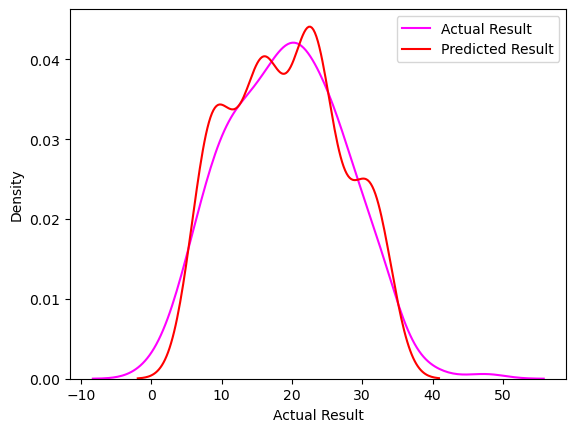

In [304]:
sns.kdeplot(data=totrain, x='Actual Result', label='Actual Result', color='magenta')
sns.kdeplot(data=totrain, x='Predicted Result', label='Predicted Result', color='red')
plt.legend()
plt.plot()

[]

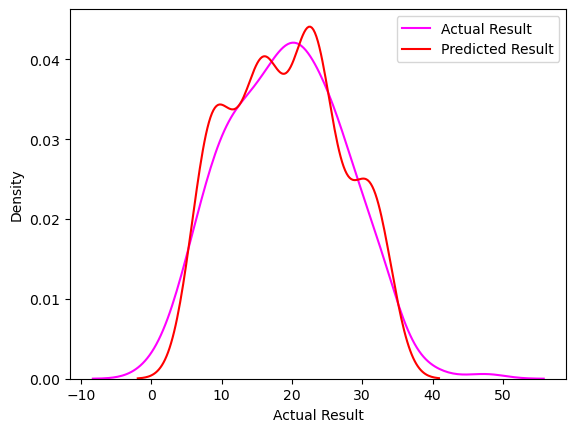

In [305]:
sns.kdeplot(data=totrain, x='Actual Result', label='Actual Result', color='magenta')
sns.kdeplot(data=totrain, x='Predicted Result', label='Predicted Result', color='red')
plt.legend()
plt.plot()


[]

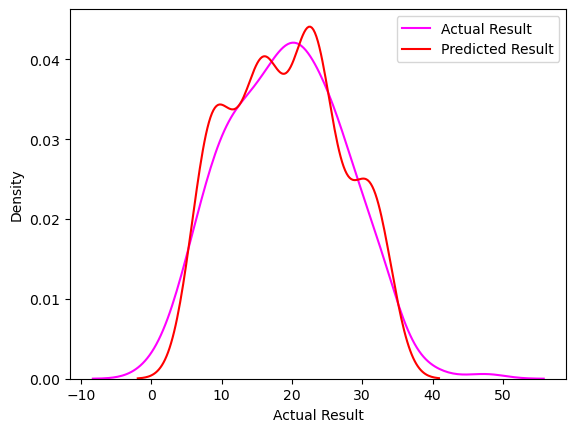

In [306]:
sn.kdeplot(data=totrain, x='Actual Result', label='Actual Result', color='magenta')
sn.kdeplot(data=totrain, x='Predicted Result', label='Predicted Result', color='red')
plt.legend()
plt.plot()

In [308]:
import pickle
file=open('bodyfatmodel1.pkl','wb')
pickle.dump(rf,file)
file.close()